In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [2]:
# get data from "metrics duration"
df = pd.read_csv('note_duration.csv',index_col=0)
print(df)
columns = df.columns.copy()

train  validation  test
0    1750         239    97
1    4844         200   188
2    3983         572   662
3    8908        3220   806
4   13038        2886  2238
..    ...         ...   ...
83   4116         247   126
84   2013         181   151
85    868          83    22
86    237          49     4
87     81          27     5

[88 rows x 3 columns]


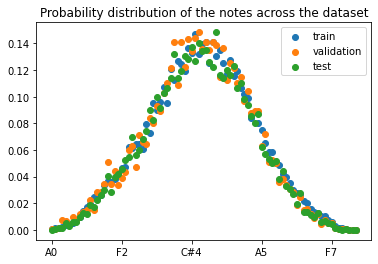

In [8]:
# preprocess to get probability
size = {"train":3639779, "validation": 438758, "test": 462494}
for key in columns:
    #df[key+"_proba"]=df[key]*(1/df[key].sum())
    df[key+"_proba"]=df[key]*(1/size[key])
    plt.scatter(df.index, df[key+"_proba"],label=key)

# custom X axis to plot notes instead of number
def notes(x, pos):
    x = int(x)+21 # note 0 is has code 21 in midi format
    notes = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    return notes[x % 12] + str((x // 12) - 1)

ax = plt.gca()
formatterx = FuncFormatter(notes)
ax.xaxis.set_major_formatter(formatterx)

plt.title('Probability distribution of the notes across the dataset')
plt.legend()
plt.show()

Unbalanced ratio of train: 1:6594.8
Normal distribution of train: mean = 42.683, std = 14.804
Unbalanced ratio of validation: 1:2410.9
Normal distribution of validation: mean = 42.190, std = 14.507
Unbalanced ratio of test: 1:17151.5
Normal distribution of test: mean = 42.231, std = 14.413


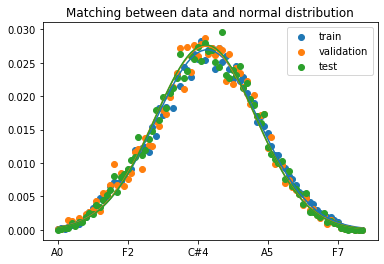

In [4]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, np.sqrt(variance))

distr = {}
for key in columns:
    # display real distribution
    plt.scatter(df.index, df[key+"_proba"],label=key)
    
    # eval normal distribution's parameters
    distr[key] = weighted_avg_and_std(df.index,df[key])

    # eval normal distribution's parameters
    print(f"Unbalanced ratio of {key}: 1:{df[key].max()/df[key].min():.1f}")
    
    # eval normal distribution according to the calculated parameters and plot it
    mean, std = distr[key]
    print(f"Normal distribution of {key}: mean = {mean:.3f}, std = {std:.3f}")
    curve = 1/(std*np.sqrt(2*np.pi))*np.exp(-1/2*np.power((df.index-mean)/std,2))
    plt.plot(df.index, curve)

# plot
ax = plt.gca()
formatterx = FuncFormatter(notes)
ax.xaxis.set_major_formatter(formatterx)

plt.title('Matching between data and normal distribution')
plt.legend()
plt.show()

Unbalanced ratio of train: 1:27.3
Unbalanced ratio of validation: 1:40.1
Unbalanced ratio of test: 1:39.2


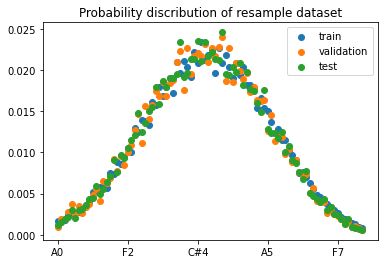

In [5]:
# experiment with one octave offset

offset = 12 # 12 semi-tones or one octave
for key in columns:
    # resample
    df[key+"_exp"] = df[key] + np.append(np.zeros(offset),df[key][:-offset]) + np.append(df[key][offset:],np.zeros(offset))
    df[key+"_exp_proba"] = df[key+"_exp"]*(1/df[key+"_exp"].sum())

    print(f"Unbalanced ratio of {key}: 1:{df[key+'_exp'].max()/df[key+'_exp'].min():.1f}")
    # display modified dataset statistics
    plt.scatter(df.index, df[key+"_exp_proba"],label=key)

# plot
ax = plt.gca()
formatterx = FuncFormatter(notes)
ax.xaxis.set_major_formatter(formatterx)

plt.title('Probability discribution of resample dataset')
plt.legend()
plt.show()